## <b> Data Preparation </b>

### Setting the row granularity

In [1]:
import pandas as pd
import numpy as np

In [2]:
entertainment = pd.read_excel('./Data/entertainment.xlsx')

In [3]:
entertainment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            600 non-null    object 
 1   entertainment   600 non-null    object 
 2   hours_per_week  595 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.2+ KB


In [4]:
entertainment[entertainment.isna().any(axis=1)]

,name,entertainment,hours_per_week
459,Amelia,books,NaN
462,Abigail,books,NaN
463,Elizabeth,books,NaN
482,Zoe,books,NaN
487,Samantha,books,NaN


In [5]:
## Summarize the table using pivot
entertainment.head()

,name,entertainment,hours_per_week
0,Emily,video_games,5.1
1,Liam,video_games,4.9
2,Olivia,video_games,4.7
3,Noah,video_games,4.6
4,Ava,video_games,5.0


In [11]:
df = pd.pivot_table(data=entertainment, 
                   values='hours_per_week',
                   index='name',
                   columns='entertainment',
                   aggfunc= "sum",
                   fill_value=0
                  ).reset_index()

In [22]:
df

,name,books,movies,tv_shows,video_games,video_game_lover
0,Aaliyah,0.5,1.5,4.6,4.9,0
1,Abigail,0.0,1.4,4.5,4.8,0
2,Addison,0.5,1.6,4.5,5.0,0
3,Adeline,3.5,4.4,4.5,6.6,0
4,Alana,2.8,3.9,3.8,5.6,0
...,...,...,...,...,...,...
145,Winifred,5.2,5.4,4.6,6.9,0
146,Xanthe,6.0,5.6,4.6,6.7,0
147,Zara,5.5,6.7,5.7,7.7,1
148,Zoe,0.0,1.5,6.1,5.2,0


### Prepare columns for modelling

In [16]:
## Create a new column video_game_lover for people who played more than 7 hours in video games

df = df.assign(video_game_lover = np.where(df['video_games']>7, 1, 0))

In [17]:
df

,name,books,movies,tv_shows,video_games,video_game_lover
0,Aaliyah,0.5,1.5,4.6,4.9,0
1,Abigail,0.0,1.4,4.5,4.8,0
2,Addison,0.5,1.6,4.5,5.0,0
3,Adeline,3.5,4.4,4.5,6.6,0
4,Alana,2.8,3.9,3.8,5.6,0
...,...,...,...,...,...,...
145,Winifred,5.2,5.4,4.6,6.9,0
146,Xanthe,6.0,5.6,4.6,6.7,0
147,Zara,5.5,6.7,5.7,7.7,1
148,Zoe,0.0,1.5,6.1,5.2,0


### Feature Engineering

In [25]:
df['total entertainment'] = df['video_games'] + df['movies'] + df['tv_shows'] + df['books']

In [26]:
df

,name,books,movies,tv_shows,video_games,video_game_lover,total entertainment
0,Aaliyah,0.5,1.5,4.6,4.9,0,11.5
1,Abigail,0.0,1.4,4.5,4.8,0,10.7
2,Addison,0.5,1.6,4.5,5.0,0,11.6
3,Adeline,3.5,4.4,4.5,6.6,0,19.0
4,Alana,2.8,3.9,3.8,5.6,0,16.1
...,...,...,...,...,...,...,...
145,Winifred,5.2,5.4,4.6,6.9,0,22.1
146,Xanthe,6.0,5.6,4.6,6.7,0,22.9
147,Zara,5.5,6.7,5.7,7.7,1,25.6
148,Zoe,0.0,1.5,6.1,5.2,0,12.8


In [27]:
df['pct screen'] = (df['movies'] + df['tv_shows'] + df['video_games'])/df['total entertainment']

In [28]:
df

,name,books,movies,tv_shows,video_games,video_game_lover,total entertainment,pct screen
0,Aaliyah,0.5,1.5,4.6,4.9,0,11.5,0.956522
1,Abigail,0.0,1.4,4.5,4.8,0,10.7,1.000000
2,Addison,0.5,1.6,4.5,5.0,0,11.6,0.956897
3,Adeline,3.5,4.4,4.5,6.6,0,19.0,0.815789
4,Alana,2.8,3.9,3.8,5.6,0,16.1,0.826087
...,...,...,...,...,...,...,...,...
145,Winifred,5.2,5.4,4.6,6.9,0,22.1,0.764706
146,Xanthe,6.0,5.6,4.6,6.7,0,22.9,0.737991
147,Zara,5.5,6.7,5.7,7.7,1,25.6,0.785156
148,Zoe,0.0,1.5,6.1,5.2,0,12.8,1.000000


### Feature Selection

In [29]:
## Save student name column as a Series
student_name = df['name']
student_name

0       Aaliyah
1       Abigail
2       Addison
3       Adeline
4         Alana
         ...   
145    Winifred
146      Xanthe
147        Zara
148         Zoe
149        Zoey
Name: name, Length: 150, dtype: object

In [32]:
df = df.drop(columns=['name'])

In [33]:
df

,books,movies,tv_shows,video_games,video_game_lover,total entertainment,pct screen
0,0.5,1.5,4.6,4.9,0,11.5,0.956522
1,0.0,1.4,4.5,4.8,0,10.7,1.000000
2,0.5,1.6,4.5,5.0,0,11.6,0.956897
3,3.5,4.4,4.5,6.6,0,19.0,0.815789
4,2.8,3.9,3.8,5.6,0,16.1,0.826087
...,...,...,...,...,...,...,...
145,5.2,5.4,4.6,6.9,0,22.1,0.764706
146,6.0,5.6,4.6,6.7,0,22.9,0.737991
147,5.5,6.7,5.7,7.7,1,25.6,0.785156
148,0.0,1.5,6.1,5.2,0,12.8,1.000000


In [43]:
features = [
    "video_game_lover",
    "total entertainment",
    "pct screen"
]

model_df = df[features]

In [44]:
model_df

,video_game_lover,total entertainment,pct screen
0,0,11.5,0.956522
1,0,10.7,1.000000
2,0,11.6,0.956897
3,0,19.0,0.815789
4,0,16.1,0.826087
...,...,...,...
145,0,22.1,0.764706
146,0,22.9,0.737991
147,1,25.6,0.785156
148,0,12.8,1.000000


### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
model_df_std = std.fit_transform(model_df)

In [52]:
model_df = pd.DataFrame(model_df_std,columns=model_df.columns)

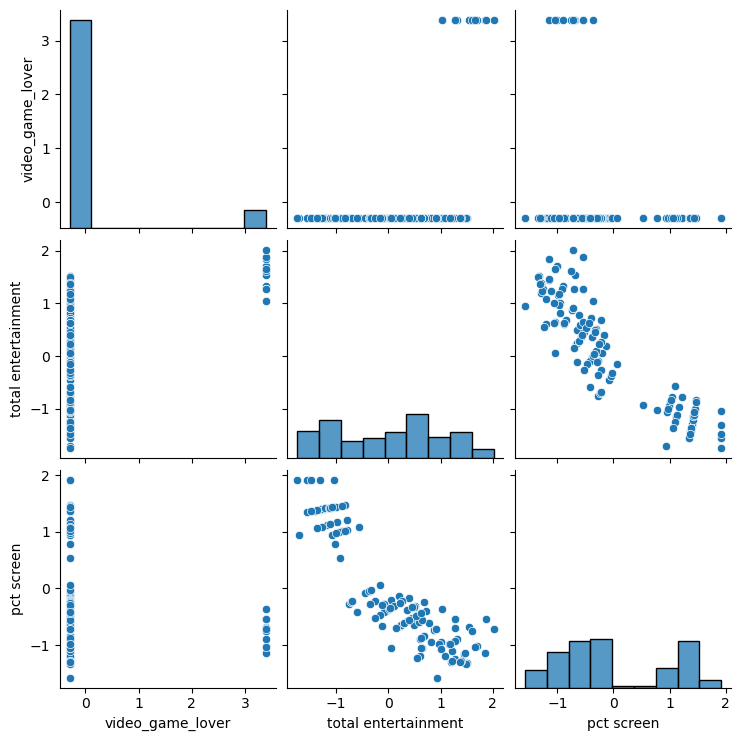

In [53]:
import seaborn as sns

sns.pairplot(model_df)

In [54]:
model_df.corr()

,video_game_lover,total entertainment,pct screen
video_game_lover,1.000000,0.452621,-0.219345
total entertainment,0.452621,1.000000,-0.911162
pct screen,-0.219345,-0.911162,1.000000


In [55]:
pd.to_pickle(model_df,'model_df.pkl')

In [56]:
pd.read_pickle('model_df.pkl')

,video_game_lover,total entertainment,pct screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658
...,...,...,...
145,-0.294884,1.177779,-0.971503
146,-0.294884,1.369314,-1.299596
147,3.391165,2.015743,-0.720344
148,-0.294884,-1.048812,1.918235
